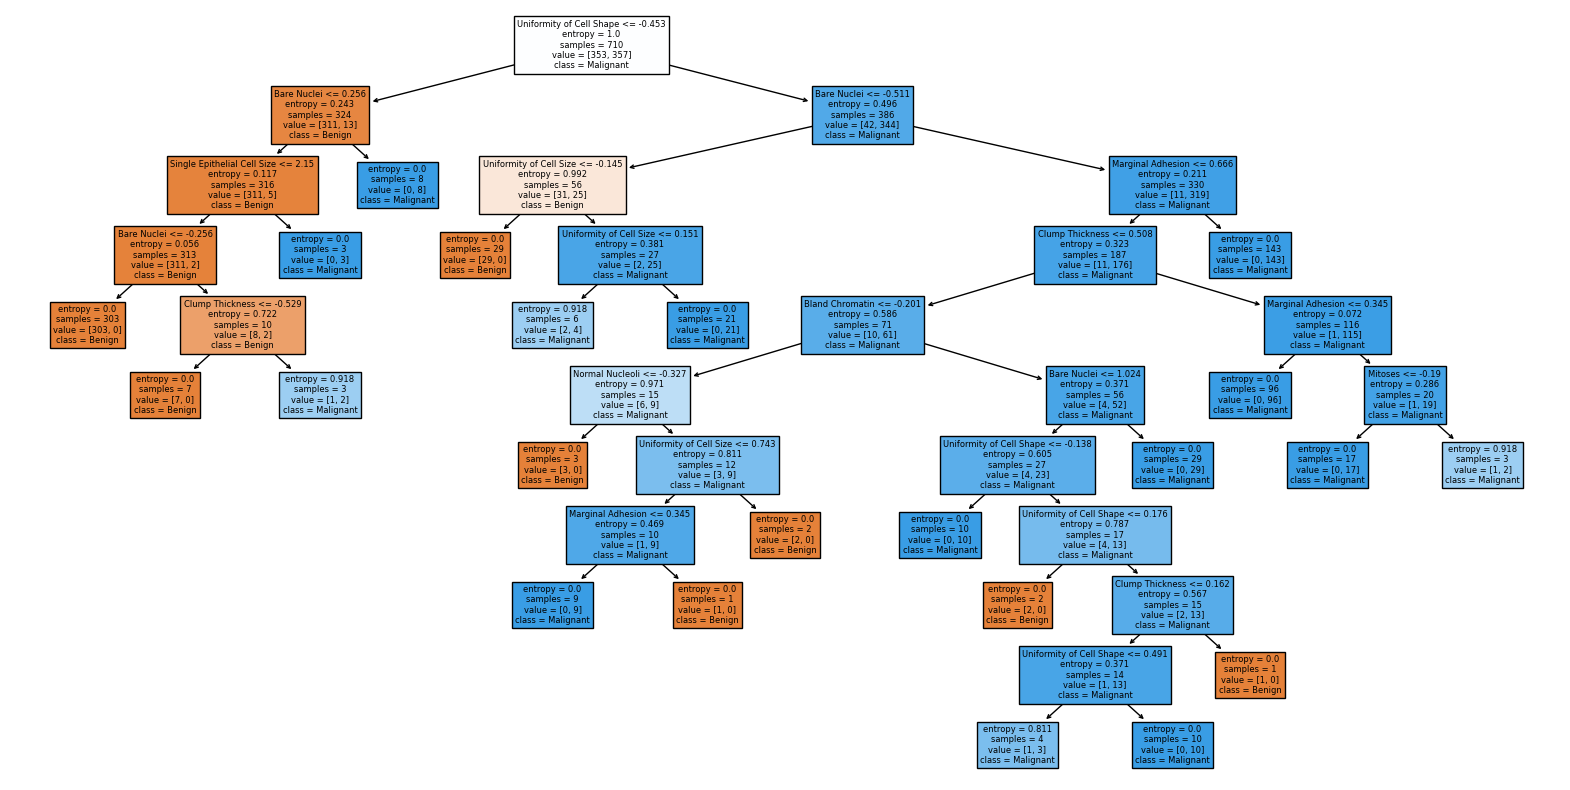

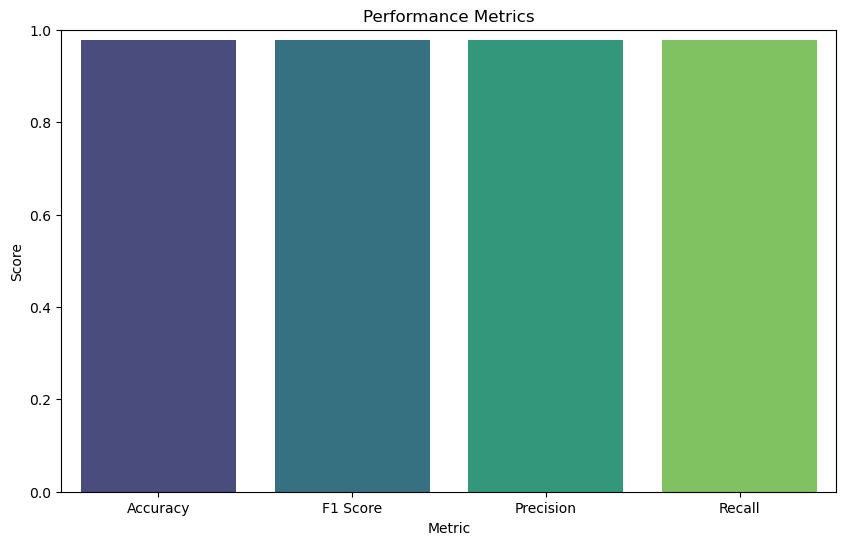

Accuracy: 0.9775280898876404
F1 Score: 0.9775280898876404
Precision: 0.9785158661563156
Recall: 0.9775280898876404


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for visualization

# Load the dataset
data = pd.read_csv("breast_cancer_dataset.csv")

# Clean missing values
data.dropna(inplace=True)

# Independent and dependent variables
X = data.drop(['Sample code number', 'Class'], axis=1)
y = data['Class']

# Data augmentation (for imbalanced datasets)
# Identify the smallest class
minority_class = y.value_counts().idxmin()
minority_data = data[data['Class'] == minority_class]

# Resample the minority class (over-sampling)
upsampled_minority = resample(minority_data, 
                              replace=True, 
                              n_samples=y.value_counts().max(), 
                              random_state=42)

# Merge with the majority class
upsampled_data = pd.concat([data[data['Class'] != minority_class], upsampled_minority])

# New independent and dependent variables
X = upsampled_data.drop(['Sample code number', 'Class'], axis=1)
y = upsampled_data['Class']

# Scale the features (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Using GridSearchCV for hyperparameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'class_weight': [None, 'balanced'],
    'splitter': ['best', 'random']
}

# Create a Decision Tree model
cart_model = DecisionTreeClassifier(random_state=42)

# Find the best parameters using GridSearchCV
grid_search = GridSearchCV(estimator=cart_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Select the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns.tolist(), class_names=['Benign', 'Malignant'], filled=True)
plt.show()

# Add performance metrics to a table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'F1 Score', 'Precision', 'Recall'],
    'Score': [accuracy, f1, precision, recall]
})

# Visualize the performance metrics
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', data=results, palette='viridis')
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.show()

# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)